In [293]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.discrete.discrete_model import MNLogit

In [294]:
# Load the provided data file
file_path = '../data/Data_MNL_all.xlsx'
data = pd.read_excel(file_path)

# Displaying the first few rows of the dataset to understand its structure
data.head()

,driver_id,beh_peta_potensi,sosdem_usia,sosdem_anggota_rt,sosdem_penghasilan_pribadi,beh_platform,beh_rata_jam_online,beh_lama_driver,loc_jumlah_pasar,loc_jumlah_sekolah,...,loc_jumlah_pickup,loc_populasi,loc_jml_b_permukiman,loc_jumlah_taman,loc_jumlah_kantor,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,jumlah_faskes,location_code
0,ikialink8@gmail.com,3,34,4,3499999.5,False,9,4,1,7,...,625,13297,1014,0,6,False,False,True,2,145
1,ikialink8@gmail.com,3,34,4,3499999.5,False,9,4,1,7,...,128,7522,1328,0,4,False,False,True,0,133
2,ikialink8@gmail.com,3,34,4,3499999.5,False,9,4,0,11,...,147,10254,1419,0,15,False,False,True,1,111
3,ikialink8@gmail.com,3,34,4,3499999.5,False,9,4,0,5,...,262,20196,2186,1,10,True,False,False,3,86
4,ikialink8@gmail.com,3,34,4,3499999.5,False,9,4,1,9,...,245,13023,2232,0,2,False,True,False,1,79


In [295]:
# Count the occurrences of each location code
location_counts = data['location_code'].value_counts()

# Filter out location codes that are selected less than or equal to 100 times
locations_to_keep = location_counts[(location_counts > 10)].index

# Filter the DataFrame to keep only the rows with these location codes
df_filtered = data[data['location_code'].isin(locations_to_keep)]

# Display the shape of the original and the filtered DataFrame
original_shape = data.shape
filtered_shape = df_filtered.shape

original_shape, filtered_shape

((24416, 27), (24332, 27))

In [296]:
data = df_filtered
data

,driver_id,beh_peta_potensi,sosdem_usia,sosdem_anggota_rt,sosdem_penghasilan_pribadi,beh_platform,beh_rata_jam_online,beh_lama_driver,loc_jumlah_pasar,loc_jumlah_sekolah,...,loc_jumlah_pickup,loc_populasi,loc_jml_b_permukiman,loc_jumlah_taman,loc_jumlah_kantor,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,jumlah_faskes,location_code
0,ikialink8@gmail.com,3,34,4,3499999.5,False,9,4,1,7,...,625,13297,1014,0,6,False,False,True,2,145
1,ikialink8@gmail.com,3,34,4,3499999.5,False,9,4,1,7,...,128,7522,1328,0,4,False,False,True,0,133
2,ikialink8@gmail.com,3,34,4,3499999.5,False,9,4,0,11,...,147,10254,1419,0,15,False,False,True,1,111
3,ikialink8@gmail.com,3,34,4,3499999.5,False,9,4,0,5,...,262,20196,2186,1,10,True,False,False,3,86
4,ikialink8@gmail.com,3,34,4,3499999.5,False,9,4,1,9,...,245,13023,2232,0,2,False,True,False,1,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24411,82115300676.0,2,37,4,9499999.5,False,11,6,1,32,...,1972,2255,829,3,18,False,False,True,6,40
24412,895402000000.0,1,52,4,3499999.5,False,11,6,0,10,...,106,38975,5928,0,7,True,False,False,1,102
24413,895402000000.0,1,52,4,3499999.5,False,11,6,1,0,...,145,20762,2983,0,1,True,False,False,2,103
24414,895402000000.0,1,52,4,3499999.5,False,11,6,0,19,...,75,22037,2198,0,9,False,False,True,4,14


In [297]:
data = data.drop(['driver_id'], axis=1)

In [298]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Replace 'location_code' with your actual target variable name
target = 'location_code'
features = data.drop(columns=[target])

# Logistic Regression with L1 (Lasso) Regularization
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)

# Fit the model
lr_l1.fit(features, data[target])

# Check for high coefficient values
coef_l1 = lr_l1.coef_
high_coef_indices = np.where(np.abs(coef_l1) > 1e+5)  # Adjust threshold as needed
if len(high_coef_indices[0]) > 0:
    print("Potential separation detected in features:", features.columns[high_coef_indices[1]])
else:
    print("No clear signs of separation detected with L1 regularization.")


No clear signs of separation detected with L1 regularization.


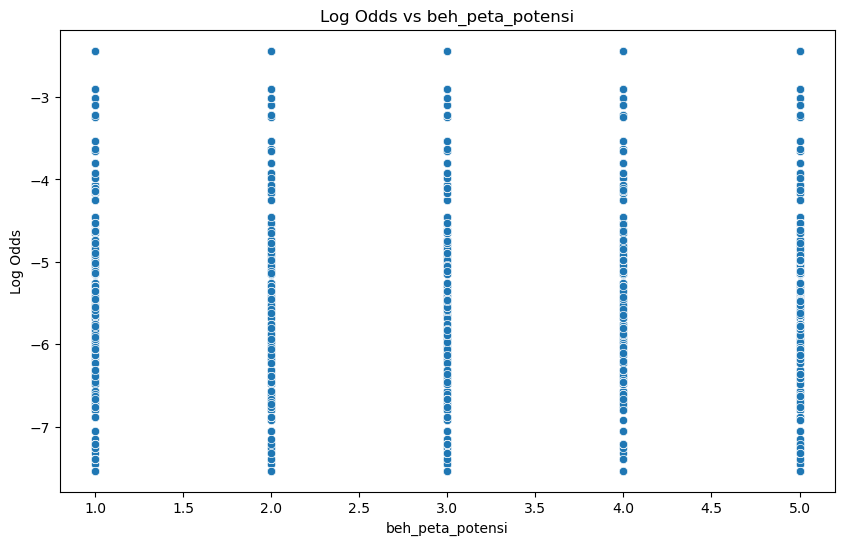

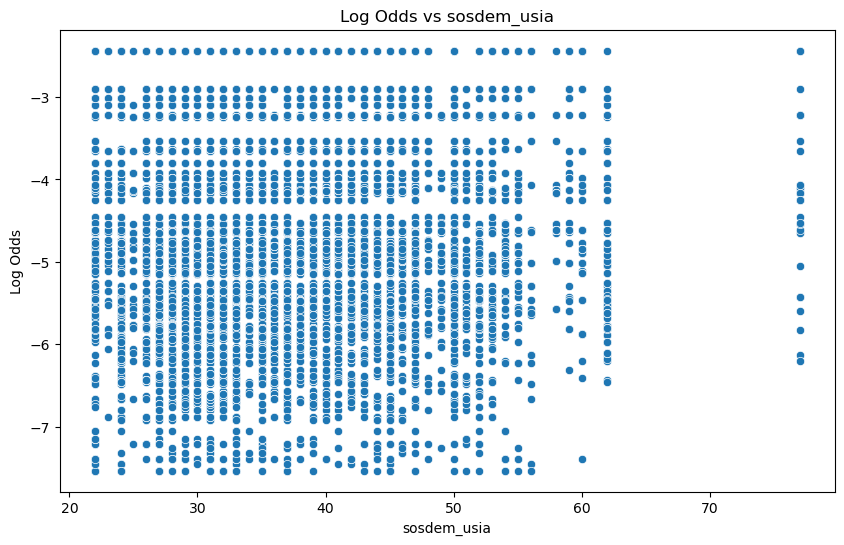

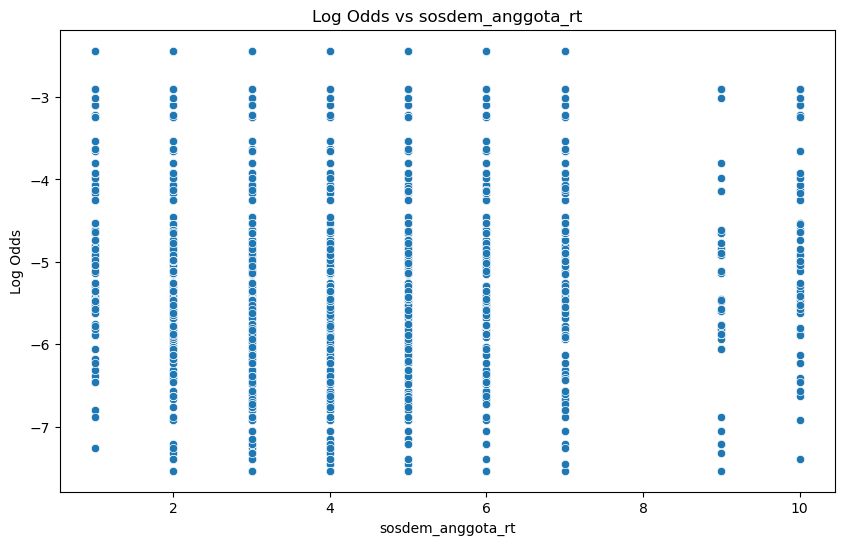

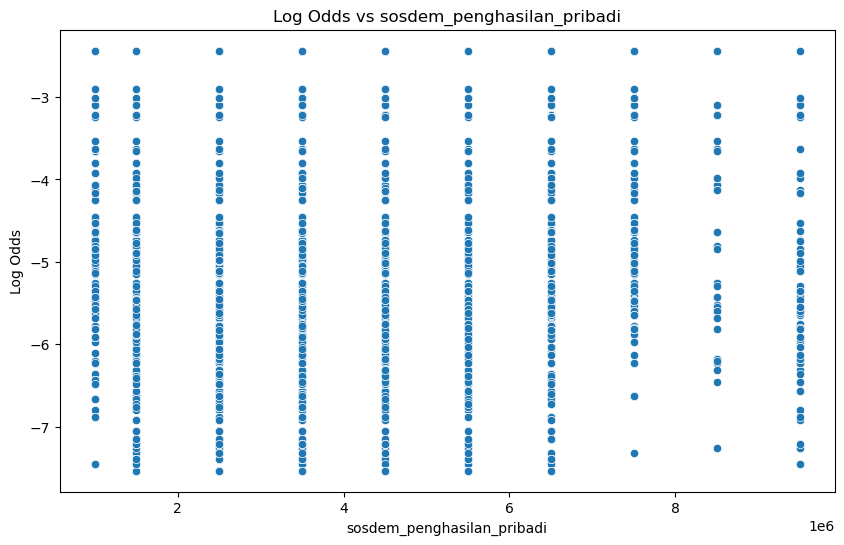

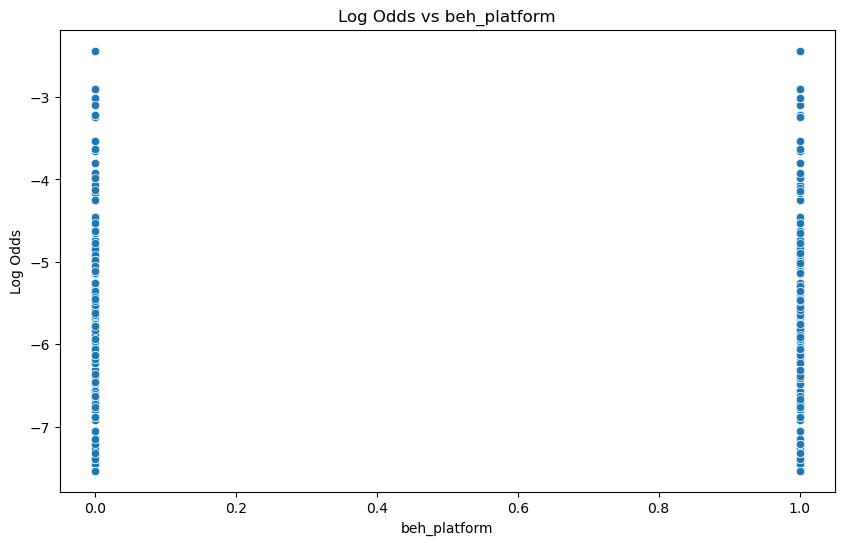

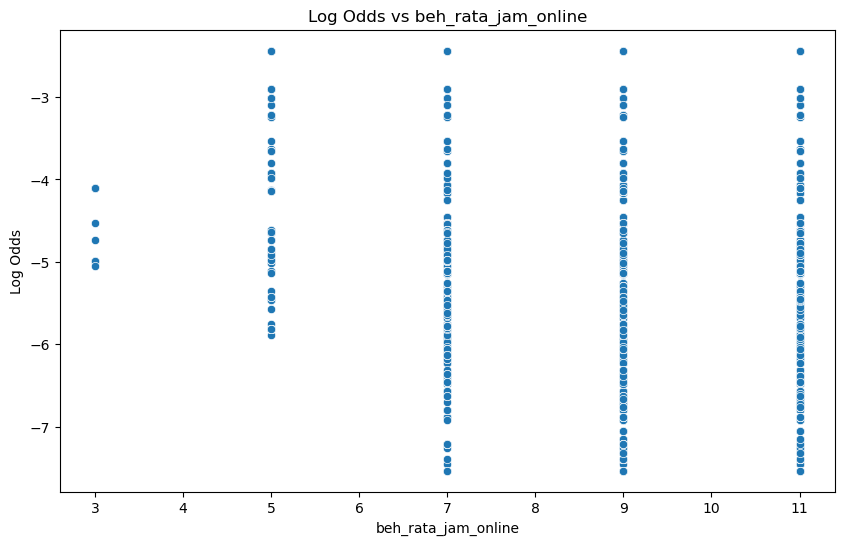

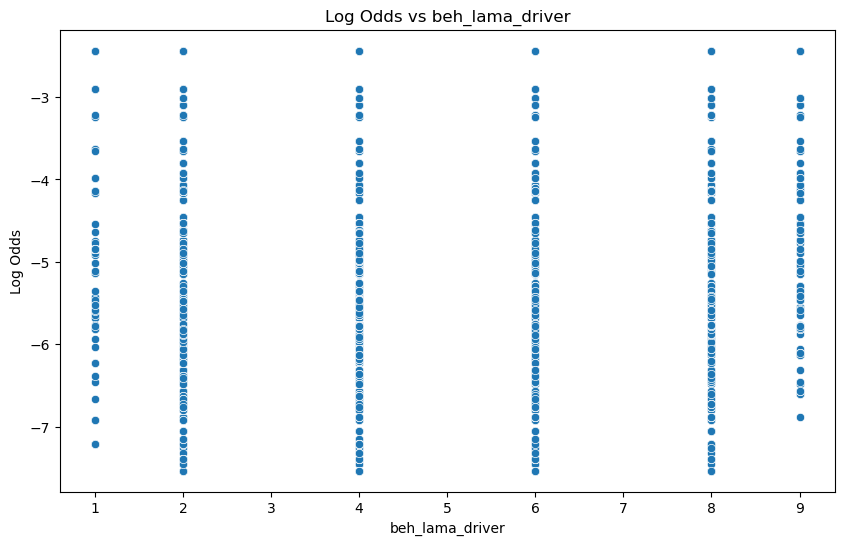

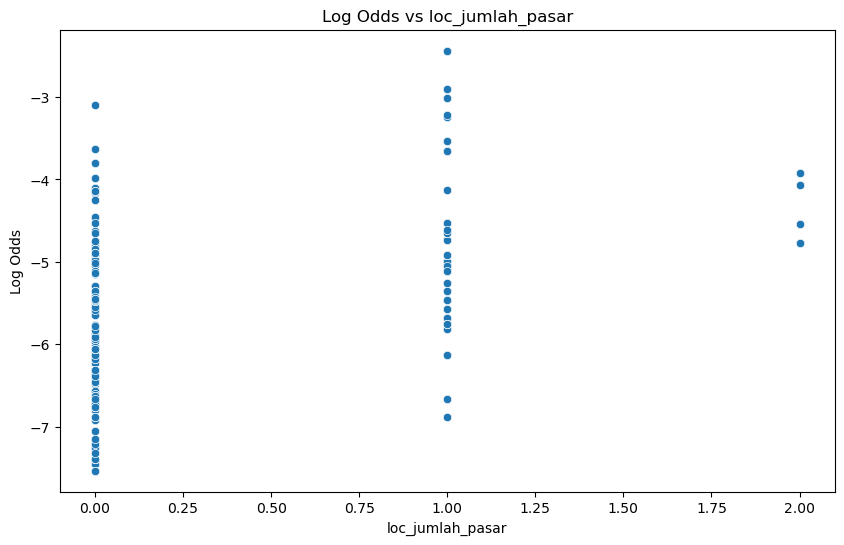

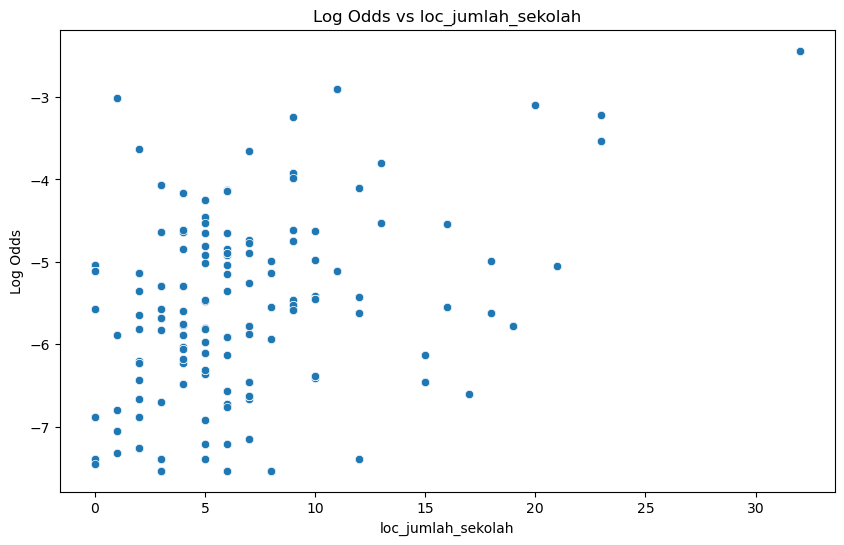

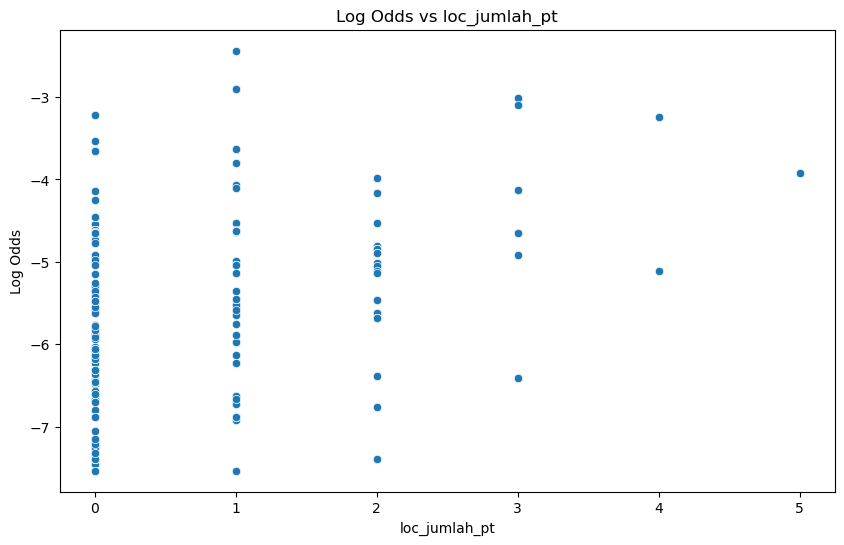

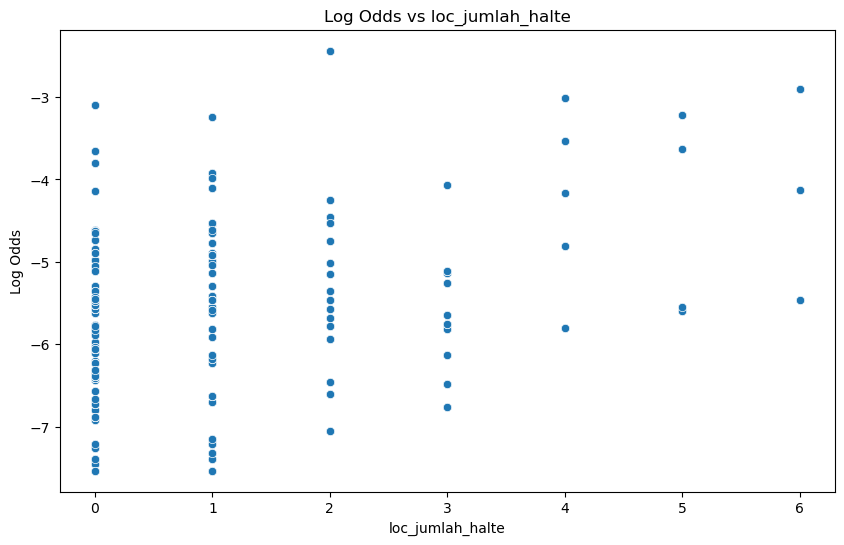

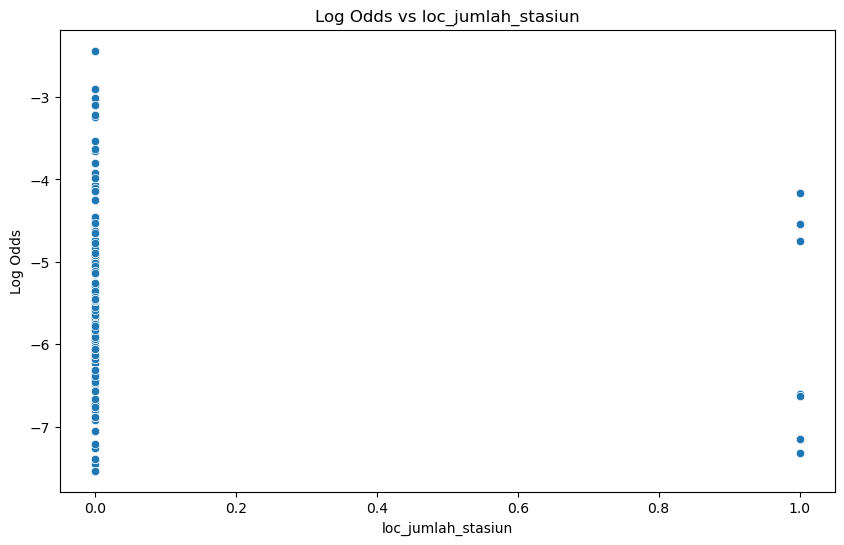

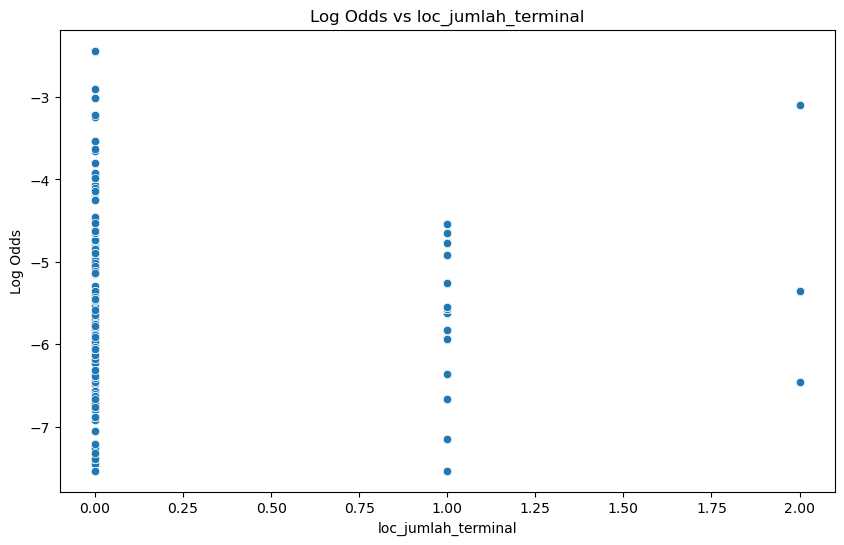

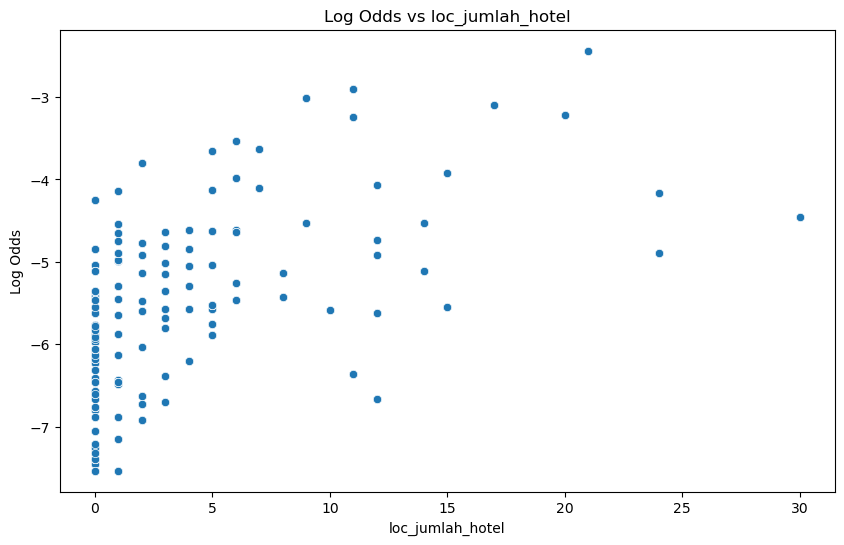

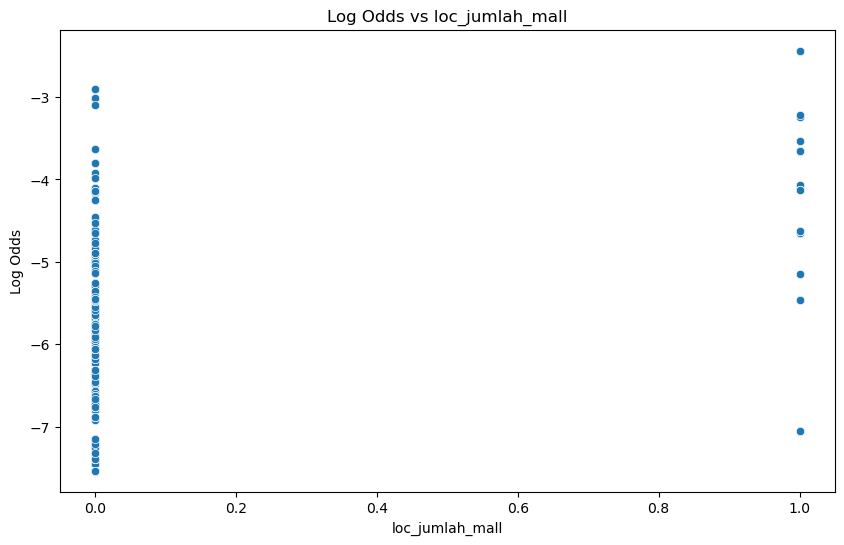

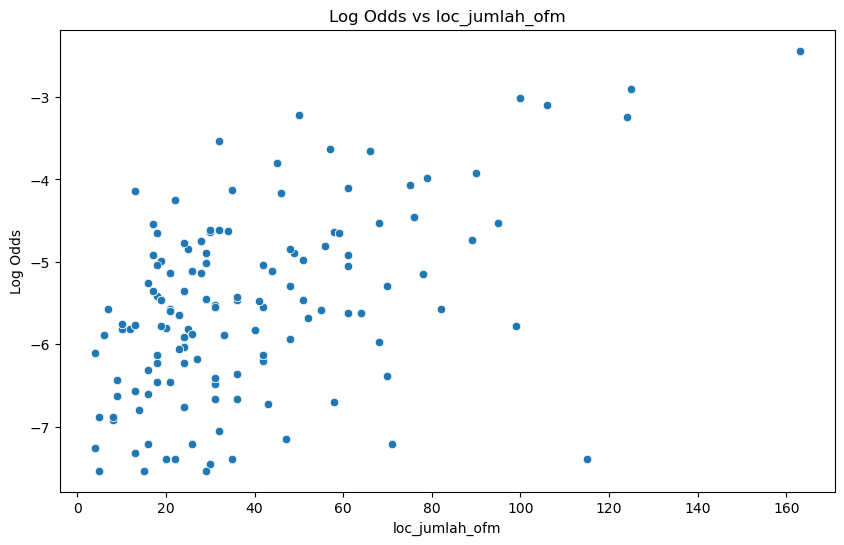

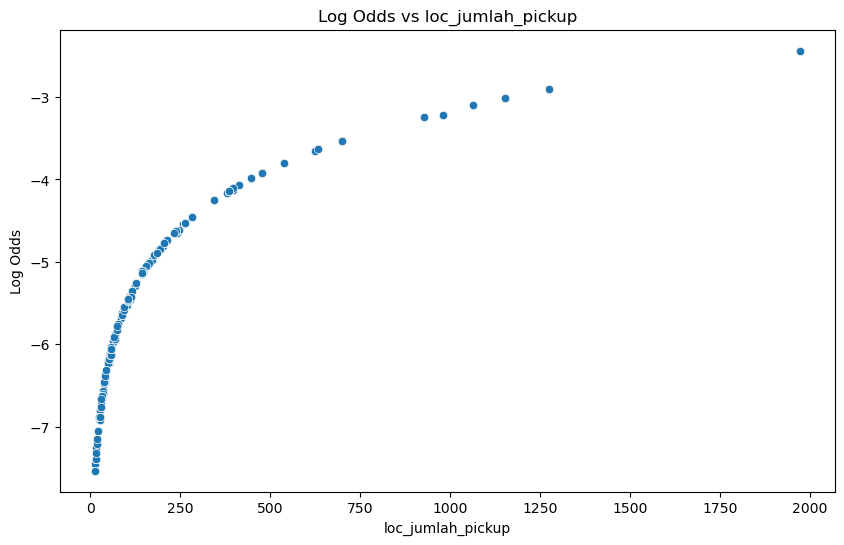

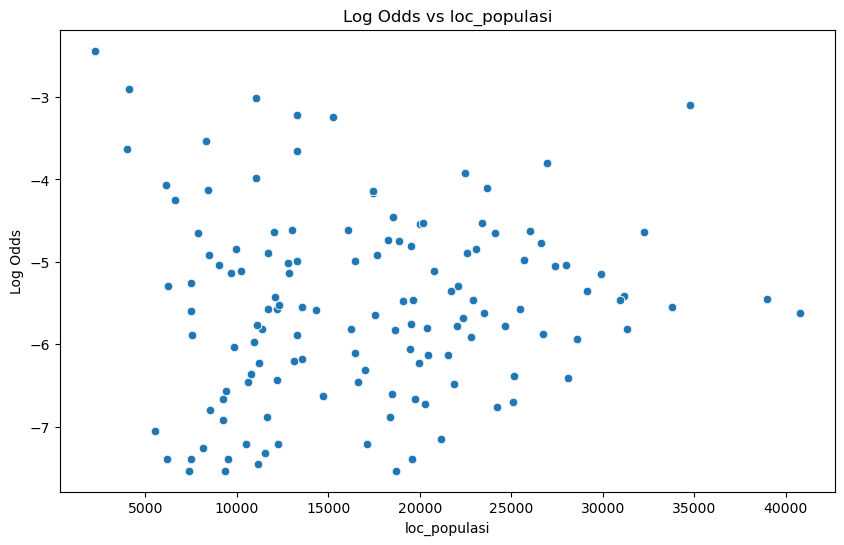

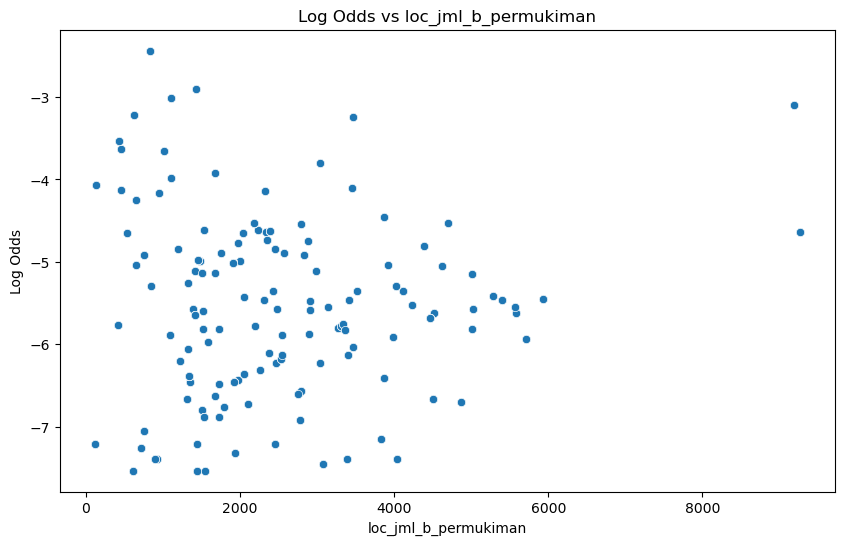

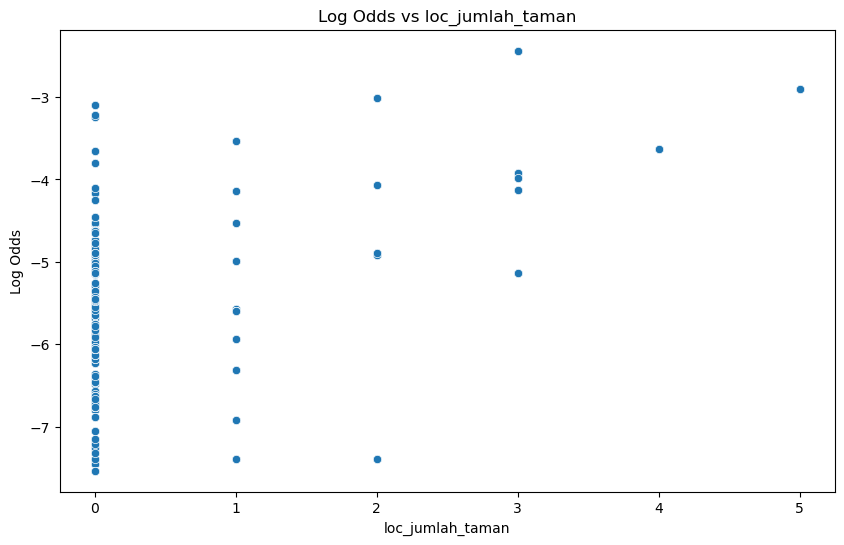

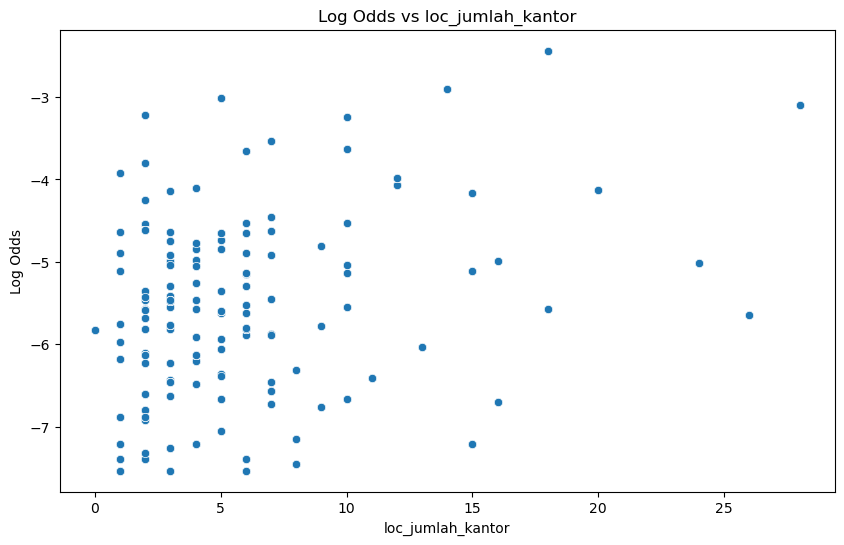

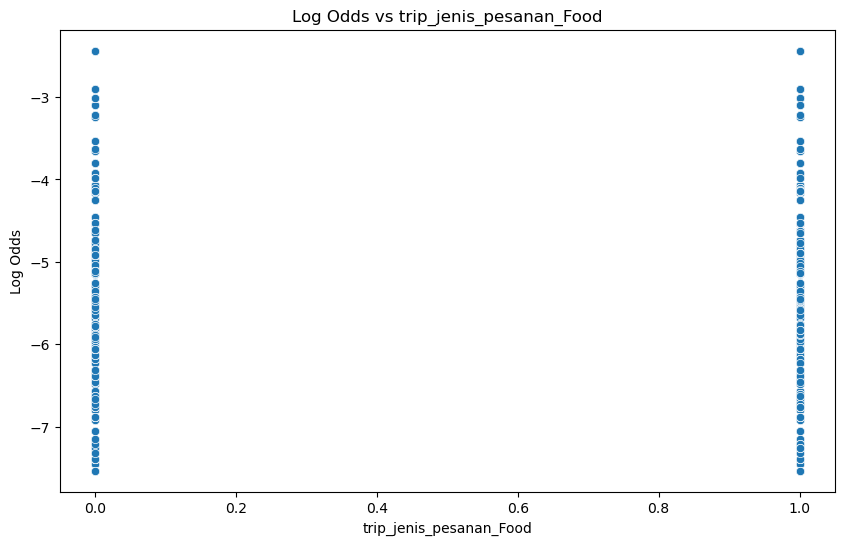

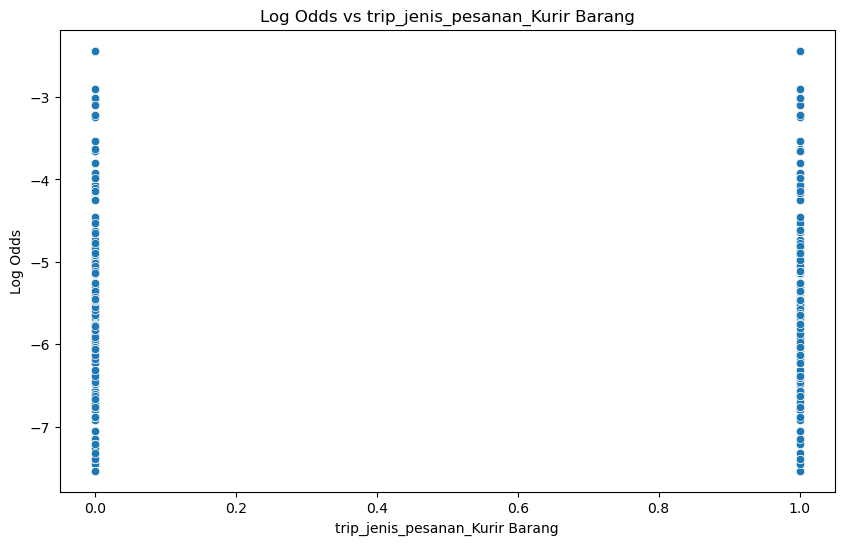

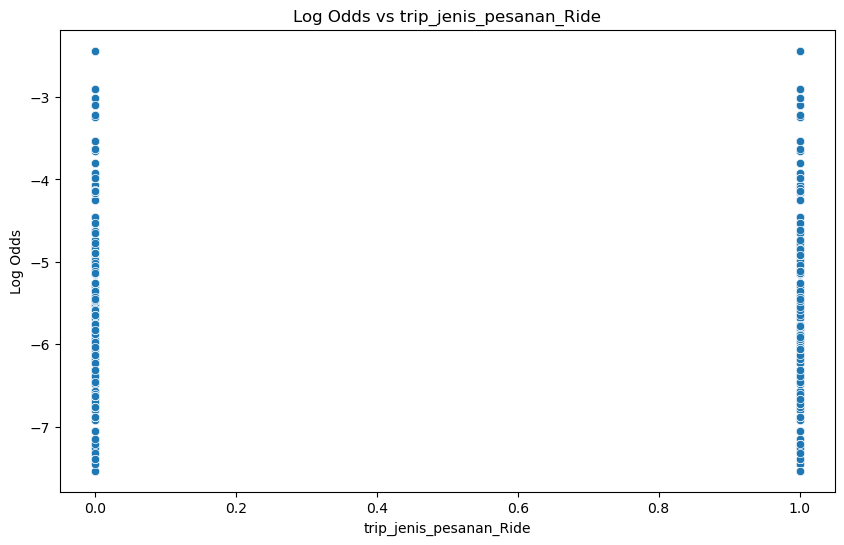

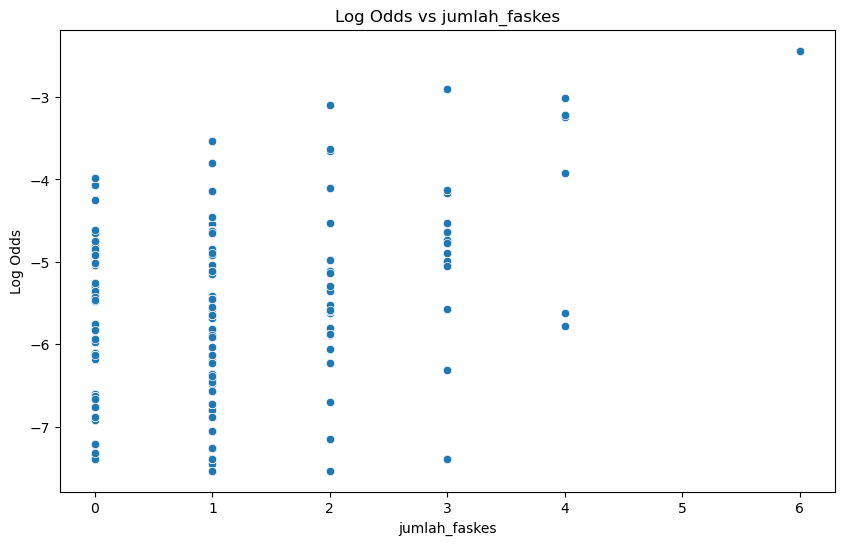

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import logit

# Calculate log odds
data['log_odds'] = logit(data[target].map(data[target].value_counts(normalize=True)))

# Plotting each feature against the log odds
for column in features.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[column], y=data['log_odds'])
    plt.title(f'Log Odds vs {column}')
    plt.xlabel(column)
    plt.ylabel('Log Odds')
    plt.show()

In [300]:
data

,beh_peta_potensi,sosdem_usia,sosdem_anggota_rt,sosdem_penghasilan_pribadi,beh_platform,beh_rata_jam_online,beh_lama_driver,loc_jumlah_pasar,loc_jumlah_sekolah,loc_jumlah_pt,...,loc_populasi,loc_jml_b_permukiman,loc_jumlah_taman,loc_jumlah_kantor,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,jumlah_faskes,location_code,log_odds
0,3,34,4,3499999.5,False,9,4,1,7,0,...,13297,1014,0,6,False,False,True,2,145,-3.660699
1,3,34,4,3499999.5,False,9,4,1,7,0,...,7522,1328,0,4,False,False,True,0,133,-5.258074
2,3,34,4,3499999.5,False,9,4,0,11,4,...,10254,1419,0,15,False,False,True,1,111,-5.116837
3,3,34,4,3499999.5,False,9,4,0,5,2,...,20196,2186,1,10,True,False,False,3,86,-4.524243
4,3,34,4,3499999.5,False,9,4,1,9,0,...,13023,2232,0,2,False,True,False,1,79,-4.613213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24411,2,37,4,9499999.5,False,11,6,1,32,1,...,2255,829,3,18,False,False,True,6,40,-2.437643
24412,1,52,4,3499999.5,False,11,6,0,10,1,...,38975,5928,0,7,True,False,False,1,102,-5.450873
24413,1,52,4,3499999.5,False,11,6,1,0,2,...,20762,2983,0,1,True,False,False,2,103,-5.116837
24414,1,52,4,3499999.5,False,11,6,0,19,0,...,22037,2198,0,9,False,False,True,4,14,-5.778972


In [301]:
import pandas as pd
import numpy as np
from statsmodels.tools.tools import add_constant
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Step 1: Data Quality Checks
# Replace infinities and drop missing values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

In [302]:
data

,beh_peta_potensi,sosdem_usia,sosdem_anggota_rt,sosdem_penghasilan_pribadi,beh_platform,beh_rata_jam_online,beh_lama_driver,loc_jumlah_pasar,loc_jumlah_sekolah,loc_jumlah_pt,...,loc_populasi,loc_jml_b_permukiman,loc_jumlah_taman,loc_jumlah_kantor,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,jumlah_faskes,location_code,log_odds
0,3,34,4,3499999.5,False,9,4,1,7,0,...,13297,1014,0,6,False,False,True,2,145,-3.660699
1,3,34,4,3499999.5,False,9,4,1,7,0,...,7522,1328,0,4,False,False,True,0,133,-5.258074
2,3,34,4,3499999.5,False,9,4,0,11,4,...,10254,1419,0,15,False,False,True,1,111,-5.116837
3,3,34,4,3499999.5,False,9,4,0,5,2,...,20196,2186,1,10,True,False,False,3,86,-4.524243
4,3,34,4,3499999.5,False,9,4,1,9,0,...,13023,2232,0,2,False,True,False,1,79,-4.613213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24411,2,37,4,9499999.5,False,11,6,1,32,1,...,2255,829,3,18,False,False,True,6,40,-2.437643
24412,1,52,4,3499999.5,False,11,6,0,10,1,...,38975,5928,0,7,True,False,False,1,102,-5.450873
24413,1,52,4,3499999.5,False,11,6,1,0,2,...,20762,2983,0,1,True,False,False,2,103,-5.116837
24414,1,52,4,3499999.5,False,11,6,0,19,0,...,22037,2198,0,9,False,False,True,4,14,-5.778972


In [303]:
# Step 2: Feature Scaling (Standardization)
# Identifying numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns.drop('location_code')
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [304]:
data

,beh_peta_potensi,sosdem_usia,sosdem_anggota_rt,sosdem_penghasilan_pribadi,beh_platform,beh_rata_jam_online,beh_lama_driver,loc_jumlah_pasar,loc_jumlah_sekolah,loc_jumlah_pt,...,loc_populasi,loc_jml_b_permukiman,loc_jumlah_taman,loc_jumlah_kantor,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,jumlah_faskes,location_code,log_odds
0,-0.088732,-0.385875,-0.005233,-0.138496,False,-0.902308,-0.650811,0.749482,-0.407429,-0.950136,...,-0.235581,-0.643594,-0.664781,-0.347909,False,False,True,-0.076420,145,0.510831
1,-0.088732,-0.385875,-0.005233,-0.138496,False,-0.902308,-0.650811,0.749482,-0.407429,-0.950136,...,-0.873465,-0.492068,-0.664781,-0.637015,False,False,True,-1.224581,133,-0.903236
2,-0.088732,-0.385875,-0.005233,-0.138496,False,-0.902308,-0.650811,-0.923122,0.051830,2.175493,...,-0.571699,-0.448155,-0.664781,0.953069,False,False,True,-0.650501,111,-0.778207
3,-0.088732,-0.385875,-0.005233,-0.138496,False,-0.902308,-0.650811,-0.923122,-0.637058,0.612678,...,0.526455,-0.078026,-0.009453,0.230304,True,False,False,0.497661,86,-0.253616
4,-0.088732,-0.385875,-0.005233,-0.138496,False,-0.902308,-0.650811,0.749482,-0.177799,-0.950136,...,-0.265846,-0.055828,-0.664781,-0.926121,False,True,False,-0.650501,79,-0.332377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24411,-0.762376,-0.026598,-0.005233,3.654289,False,0.654119,0.441107,0.749482,2.462938,-0.168729,...,-1.455237,-0.732869,1.301202,1.386728,False,False,True,2.219903,40,1.593534
24412,-1.436019,1.769789,-0.005233,-0.138496,False,0.654119,0.441107,-0.923122,-0.062985,-0.168729,...,2.600708,1.727739,-0.664781,-0.203356,True,False,False,-0.650501,102,-1.073911
24413,-1.436019,1.769789,-0.005233,-0.138496,False,0.654119,0.441107,0.749482,-1.211131,0.612678,...,0.588973,0.306580,-0.664781,-1.070674,True,False,False,-0.076420,103,-0.778207
24414,-1.436019,1.769789,-0.005233,-0.138496,False,0.654119,0.441107,-0.923122,0.970347,-0.950136,...,0.729804,-0.072235,-0.664781,0.085750,False,False,True,1.071742,14,-1.364359


In [305]:
# Step 3: Addressing Multicollinearity
# Calculating VIF and dropping highly correlated variables
vif_data = pd.DataFrame()
vif_data['feature'] = numerical_features
vif_data['VIF'] = [variance_inflation_factor(data[numerical_features].values, i) for i in range(len(numerical_features))]


In [306]:
vif_data

,feature,VIF
0,beh_peta_potensi,1.042431
1,sosdem_usia,1.146909
2,sosdem_anggota_rt,1.073741
3,sosdem_penghasilan_pribadi,1.041833
4,beh_rata_jam_online,1.057061
5,beh_lama_driver,1.120313
6,loc_jumlah_pasar,2.040538
7,loc_jumlah_sekolah,3.661635
8,loc_jumlah_pt,1.799721
9,loc_jumlah_halte,2.138617


In [308]:
high_vif_features = vif_data[vif_data['VIF'] > 10]['feature']
high_vif_features

15    loc_jumlah_pickup
Name: feature, dtype: object

In [309]:
data.drop(columns=high_vif_features, inplace=True)

In [310]:
data

,beh_peta_potensi,sosdem_usia,sosdem_anggota_rt,sosdem_penghasilan_pribadi,beh_platform,beh_rata_jam_online,beh_lama_driver,loc_jumlah_pasar,loc_jumlah_sekolah,loc_jumlah_pt,...,loc_populasi,loc_jml_b_permukiman,loc_jumlah_taman,loc_jumlah_kantor,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,jumlah_faskes,location_code,log_odds
0,-0.088732,-0.385875,-0.005233,-0.138496,False,-0.902308,-0.650811,0.749482,-0.407429,-0.950136,...,-0.235581,-0.643594,-0.664781,-0.347909,False,False,True,-0.076420,145,0.510831
1,-0.088732,-0.385875,-0.005233,-0.138496,False,-0.902308,-0.650811,0.749482,-0.407429,-0.950136,...,-0.873465,-0.492068,-0.664781,-0.637015,False,False,True,-1.224581,133,-0.903236
2,-0.088732,-0.385875,-0.005233,-0.138496,False,-0.902308,-0.650811,-0.923122,0.051830,2.175493,...,-0.571699,-0.448155,-0.664781,0.953069,False,False,True,-0.650501,111,-0.778207
3,-0.088732,-0.385875,-0.005233,-0.138496,False,-0.902308,-0.650811,-0.923122,-0.637058,0.612678,...,0.526455,-0.078026,-0.009453,0.230304,True,False,False,0.497661,86,-0.253616
4,-0.088732,-0.385875,-0.005233,-0.138496,False,-0.902308,-0.650811,0.749482,-0.177799,-0.950136,...,-0.265846,-0.055828,-0.664781,-0.926121,False,True,False,-0.650501,79,-0.332377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24411,-0.762376,-0.026598,-0.005233,3.654289,False,0.654119,0.441107,0.749482,2.462938,-0.168729,...,-1.455237,-0.732869,1.301202,1.386728,False,False,True,2.219903,40,1.593534
24412,-1.436019,1.769789,-0.005233,-0.138496,False,0.654119,0.441107,-0.923122,-0.062985,-0.168729,...,2.600708,1.727739,-0.664781,-0.203356,True,False,False,-0.650501,102,-1.073911
24413,-1.436019,1.769789,-0.005233,-0.138496,False,0.654119,0.441107,0.749482,-1.211131,0.612678,...,0.588973,0.306580,-0.664781,-1.070674,True,False,False,-0.076420,103,-0.778207
24414,-1.436019,1.769789,-0.005233,-0.138496,False,0.654119,0.441107,-0.923122,0.970347,-0.950136,...,0.729804,-0.072235,-0.664781,0.085750,False,False,True,1.071742,14,-1.364359


In [311]:
# Step 4: Model Fitting
# Preparing independent and dependent variables
independent_vars = add_constant(data.drop(columns=[
    'location_code', 'trip_jenis_pesanan_Ride', 'trip_jenis_pesanan_Kurir Barang', 'beh_platform', 'trip_jenis_pesanan_Food',
    'beh_peta_potensi', 'sosdem_anggota_rt', 'sosdem_penghasilan_pribadi', 'beh_rata_jam_online', 'beh_lama_driver', 'log_odds']))
dependent_var = data['location_code']

In [312]:
independent_vars

,const,sosdem_usia,loc_jumlah_pasar,loc_jumlah_sekolah,loc_jumlah_pt,loc_jumlah_halte,loc_jumlah_stasiun,loc_jumlah_terminal,loc_jumlah_hotel,loc_jumlah_mall,loc_jumlah_ofm,loc_populasi,loc_jml_b_permukiman,loc_jumlah_taman,loc_jumlah_kantor,jumlah_faskes
0,1.0,-0.385875,0.749482,-0.407429,-0.950136,-0.998419,-0.200017,-0.344689,-0.451286,1.633332,0.007964,-0.235581,-0.643594,-0.664781,-0.347909,-0.076420
1,1.0,-0.385875,0.749482,-0.407429,-0.950136,0.564603,-0.200017,1.699918,-0.316873,-0.612246,-1.126273,-0.873465,-0.492068,-0.664781,-0.637015,-1.224581
2,1.0,-0.385875,-0.923122,0.051830,2.175493,0.564603,-0.200017,-0.344689,0.758425,-0.612246,-0.491100,-0.571699,-0.448155,-0.664781,0.953069,-0.650501
3,1.0,-0.385875,-0.923122,-0.637058,0.612678,0.043596,-0.200017,-0.344689,0.758425,-0.612246,0.053333,0.526455,-0.078026,-0.009453,0.230304,0.497661
4,1.0,-0.385875,0.749482,-0.177799,-0.950136,-0.998419,-0.200017,-0.344689,-0.316873,-0.612246,-0.763317,-0.265846,-0.055828,-0.664781,-0.926121,-0.650501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24411,1.0,-0.026598,0.749482,2.462938,-0.168729,0.043596,-0.200017,-0.344689,1.699312,1.633332,2.208383,-1.455237,-0.732869,1.301202,1.386728,2.219903
24412,1.0,1.769789,-0.923122,-0.062985,-0.168729,-0.998419,-0.200017,-0.344689,-0.988935,-0.612246,-0.831371,2.600708,1.727739,-0.664781,-0.203356,-0.650501
24413,1.0,1.769789,0.749482,-1.211131,0.612678,-0.998419,-0.200017,-0.344689,-1.123347,-0.612246,-0.899426,0.588973,0.306580,-0.664781,-1.070674,-0.076420
24414,1.0,1.769789,-0.923122,0.970347,-0.950136,-0.998419,-0.200017,-0.344689,-1.123347,-0.612246,0.756560,0.729804,-0.072235,-0.664781,0.085750,1.071742


In [313]:


# Fit the model (with adjustments for large choice set)
try:
    mnl_model = MNLogit(dependent_var, independent_vars)
    mnl_fit = mnl_model.fit(method='bfgs', maxiter=10000)  # Using BFGS method and increased iterations
    summary = mnl_fit.summary()
except Exception as e:
    summary = str(e)

# Output
print(summary)

/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3057: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3058: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)
/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]
/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3057: RuntimeWarning: divide by zero enco

         Current function value: nan
         Iterations: 245
         Function evaluations: 347
         Gradient evaluations: 347


/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3057: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3058: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


need covariance of parameters for computing (unnormalized) covariances
